IMPORT STATEMENTS

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

LOADING DATASET


In [34]:
data=pd.read_csv('newmoviedata.csv')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [36]:
data.tail(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [37]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [39]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [40]:
data.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [41]:
data.isna().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [42]:
cols=data.columns
cols

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [43]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [44]:
print("number of rows",data.shape[0],"\nnumber of columns",data.shape[1])

number of rows 15509 
number of columns 10


In [45]:
data['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [46]:
data['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [47]:
data.drop_duplicates(inplace=True)
data.dropna(subset=['Name','Year','Votes','Rating','Duration'],inplace=True)
null_val_counts=data.isna().sum()
print(null_val_counts)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [48]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [49]:
Name_and_rating=data[['Name','Rating']]
Name_and_rating
print(Name_and_rating.head(10))
print('\n',Name_and_rating.tail(10))

                                  Name  Rating
1   #Gadhvi (He thought he was Gandhi)     7.0
3                              #Yaaram     4.4
5                 ...Aur Pyaar Ho Gaya     4.7
6                            ...Yahaan     7.4
8                   ?: A Question Mark     5.6
9                             @Andheri     4.0
10           1:1.6 An Ode to Lost Love     6.2
11                1:13:7 Ek Tera Saath     5.9
12                            100 Days     6.5
13                           100% Love     5.7

                                      Name  Rating
15482                    Zindagi Zindabad     5.7
15487                            Zokkomon     4.0
15488                                 Zoo     5.7
15490  Zor: Never Underestimate the Force     4.3
15492                               Zorro     5.6
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                          

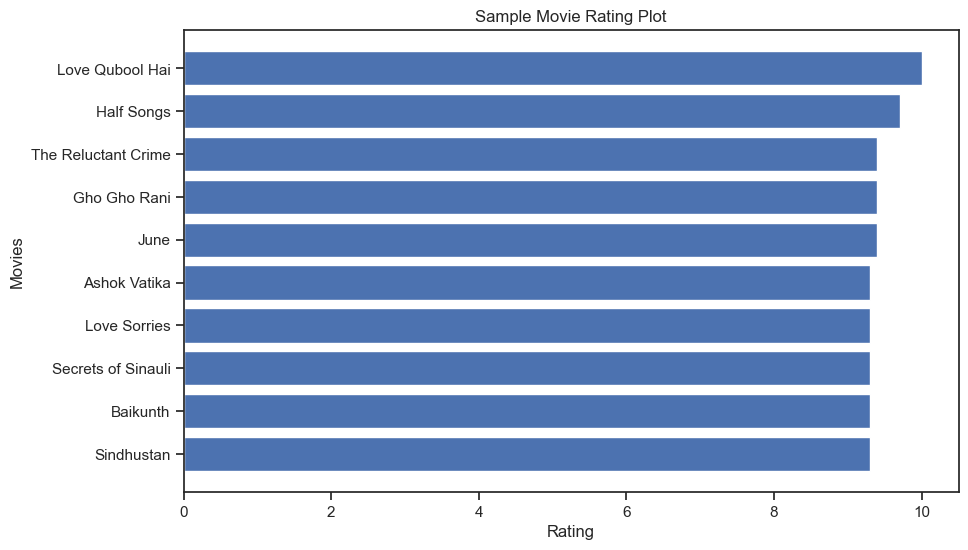

In [50]:
highly_rated_movies=data.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(highly_rated_movies['Name'],highly_rated_movies['Rating'])
plt.title('Sample Movie Rating Plot')
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.gca().invert_yaxis()
plt.show()

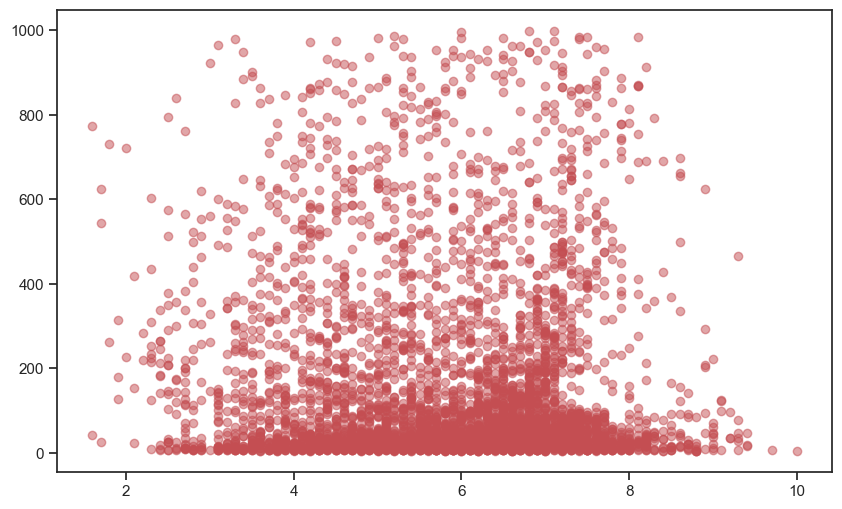

In [51]:
data['Votes']=pd.to_numeric(data['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(data['Rating'],data['Votes'],alpha=0.5,color='r')
plt.show()

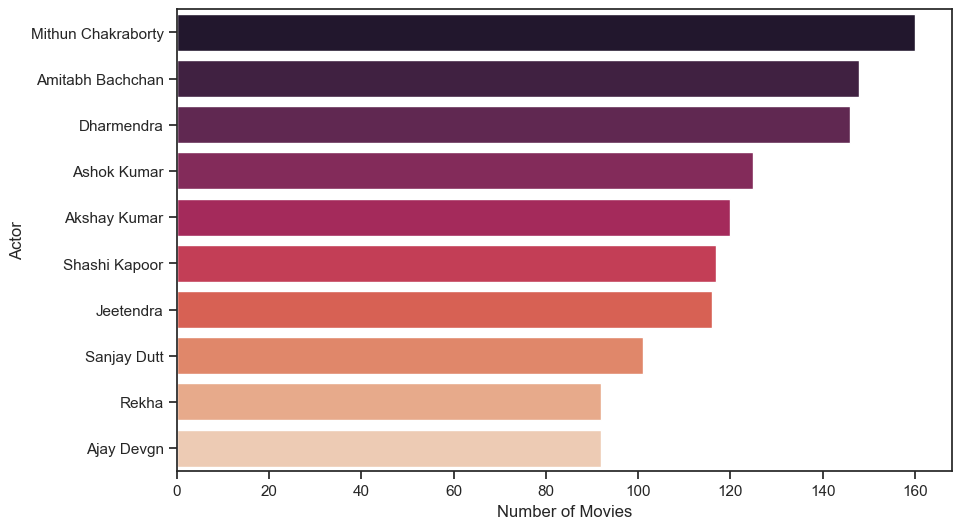

In [52]:
actors=pd.concat([data['Actor 1'],data['Actor 2'],data['Actor 3']])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=['Actor','Number of Movies']
plt.figure(figsize=(10,6))
sb.barplot(x='Number of Movies',y='Actor',data=actor_counts.head(10),palette='rocket',hue='Actor',legend=False)
plt.show()

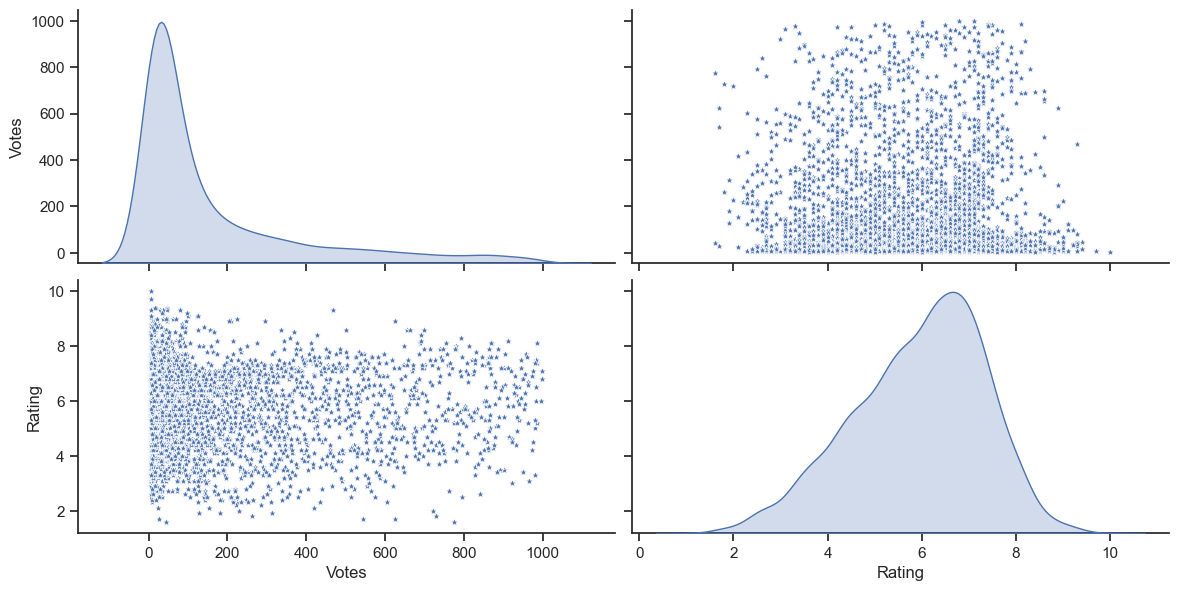

In [53]:
columns_of_interest=['Votes','Rating','Duration','Year']
sb.set(style='ticks')
sb.pairplot(data[columns_of_interest],diag_kind='kde',markers='*',height=3,aspect=2)
plt.show()

<AxesSubplot: >

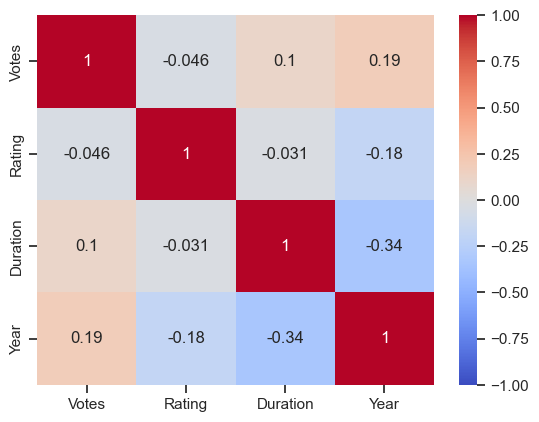

In [54]:
import re
data['Duration'] = data['Duration'].astype(str)
data['Year'] = data['Year'].astype(str)
def extract_duration(value):
    matches = re.findall(r'(\d+) min', value)
    return float(matches[0]) if matches else None
data['Duration'] = data['Duration'].apply(extract_duration)
def extract_year(value):
    matches = re.findall(r'(\d+)', value)
    return float(matches[0]) if matches else None
data['Year'] = data['Year'].apply(extract_year)
numeric_columns = ['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix = data[numeric_columns].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [55]:
print(data.head(10).sort_values(ascending=False,by='Rating'))
print('\n',data.tail(10).sort_values(ascending=False,by='Rating'))

                                  Name    Year  Duration  \
6                            ...Yahaan  2005.0     142.0   
1   #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
12                            100 Days  1991.0     161.0   
10           1:1.6 An Ode to Lost Love  2004.0      96.0   
11                1:13:7 Ek Tera Saath  2016.0     120.0   
13                           100% Love  2012.0     166.0   
8                   ?: A Question Mark  2012.0      82.0   
5                 ...Aur Pyaar Ho Gaya  1997.0     147.0   
3                              #Yaaram  2019.0     110.0   
9                             @Andheri  2014.0     116.0   

                        Genre  Rating  Votes           Director  \
6         Drama, Romance, War     7.4    NaN     Shoojit Sircar   
1                       Drama     7.0    8.0      Gaurav Bakshi   
12  Horror, Romance, Thriller     6.5  983.0       Partho Ghosh   
10                      Drama     6.2   17.0        Madhu Ambat   
11  

In [56]:
data=data.dropna(subset='Votes')
print(data.head())

                                 Name    Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0   
3                             #Yaaram  2019.0     110.0   
5                ...Aur Pyaar Ho Gaya  1997.0     147.0   
8                  ?: A Question Mark  2012.0      82.0   
9                            @Andheri  2014.0     116.0   

                       Genre  Rating  Votes           Director       Actor 1  \
1                      Drama     7.0    8.0      Gaurav Bakshi  Rasika Dugal   
3            Comedy, Romance     4.4   35.0         Ovais Khan       Prateik   
5     Comedy, Drama, Musical     4.7  827.0       Rahul Rawail    Bobby Deol   
8  Horror, Mystery, Thriller     5.6  326.0      Allyson Patel     Yash Dave   
9    Action, Crime, Thriller     4.0   11.0  Biju Bhaskar Nair     Augustine   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    

In [57]:
x=data[['Year','Duration','Votes']]
y=data['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [58]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(MAE,RMSE,r2)

1.0848311387601357 1.3484226346477917 0.09812163840290855


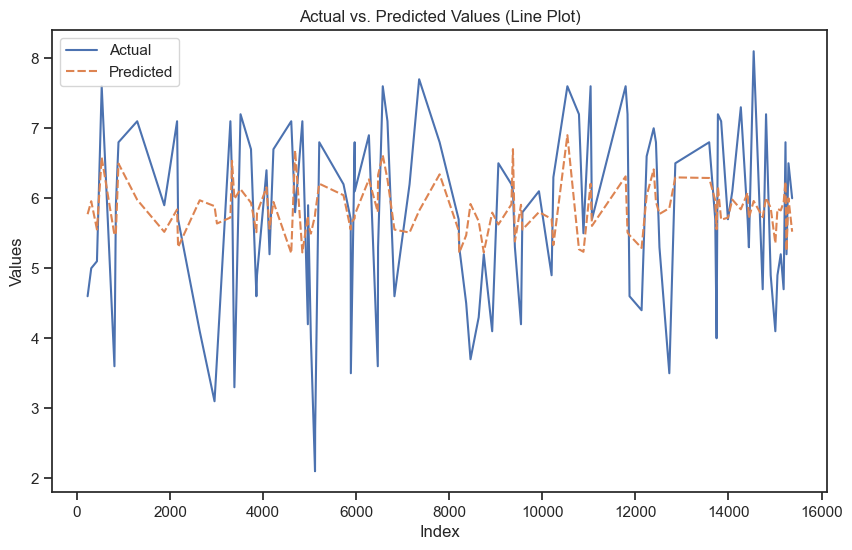

In [59]:
sample_indexes = np.random.choice(len(y_test), 100, replace=False)
plt.figure(figsize=(10, 6))
sb.lineplot(data=pd.DataFrame({'Actual': y_test.iloc[sample_indexes], 'Predicted': y_pred[sample_indexes]}))
plt.title('Actual vs. Predicted Values (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()



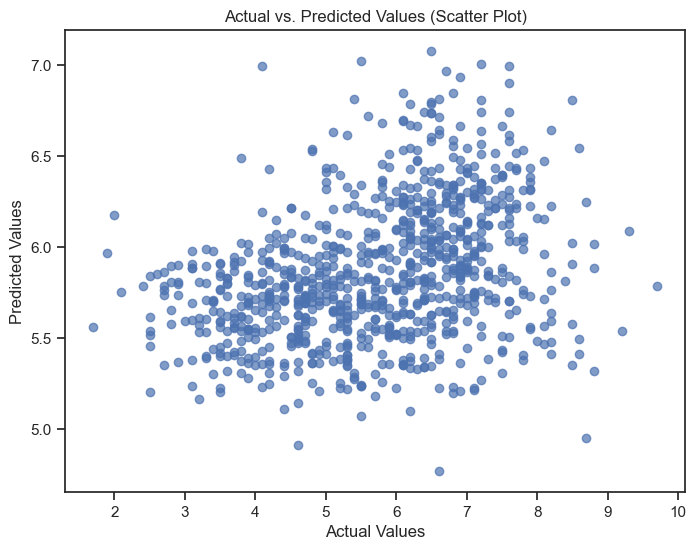

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

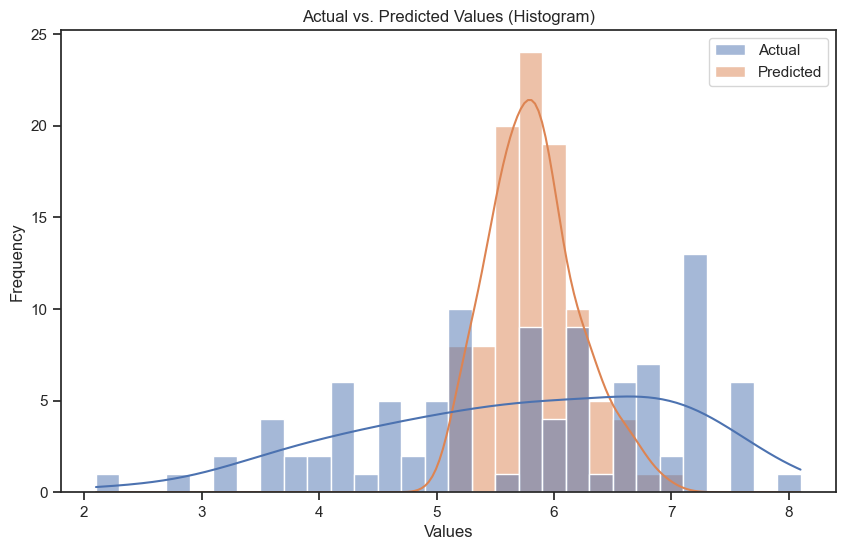

In [61]:
plt.figure(figsize=(10, 6))
sb.histplot(data=pd.DataFrame({'Actual': y_test.iloc[sample_indexes], 'Predicted': y_pred[sample_indexes]}), bins=30, kde=True)
plt.title('Actual vs. Predicted Values (Histogram)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [62]:
user_input = {
    'Year': 2022,
    'Duration': 120,
    'Votes': 500
}
input_features = pd.DataFrame([user_input])
predicted_rating = model.predict(input_features)
print("Predicted Rating:", round(predicted_rating[0],1))

Predicted Rating: 5.5


In [63]:
import pandas as pd

# Assuming 'cleaned_data' is your DataFrame containing the cleaned data
data.to_csv('cleaned_data.csv', index=False)


In [64]:
new_data=pd.read_csv('cleaned_data.csv')
new_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
4,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...
4477,Zorro,1975.0,150.0,"Action, Adventure, Comedy",5.6,33.0,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
4478,Zubaan,2015.0,115.0,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
4479,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
4480,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
